In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Data

In [35]:
df_train = pd.read_csv("Webpages_Classification_train_data.csv")
df_test = pd.read_csv("Webpages_Classification_test_data.csv")

#Ensuring correct sequence of columns 
df_train = df_train[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]
df_test = df_test[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]

### Split Data 

In [39]:
df_test
#df_train

# Separate "good" and "bad" samples in df_train
good_samples = df_train[df_train['label'] == 'good']
bad_samples = df_train[df_train['label'] == 'bad']

# Calculate the number of samples needed for each class
num_samples = min(len(good_samples), len(bad_samples))

# Sample the same number of "good" and "bad" samples
good_samples_reduced = good_samples.sample(n=num_samples, random_state=42)
bad_samples_reduced = bad_samples.sample(n=num_samples, random_state=42)

# Concatenate the reduced samples
df_train_reduced = pd.concat([good_samples_reduced, bad_samples_reduced])

# Shuffle the DataFrame to mix the samples
df_train_reduced = df_train_reduced.sample(frac=1, random_state=42)

# Now df_train_reduced contains the same number of "good" and "bad" samples
# Do the same for df_test
df_test_reduced = pd.concat([good_samples.sample(n=num_samples, random_state=42),
                             bad_samples.sample(n=num_samples, random_state=42)])
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

# Ensure consistency of columns
df_test_reduced = df_test_reduced[df_train_reduced.columns]

# Shuffle the DataFrame to mix the samples
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

df_train_reduced

,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good
...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good


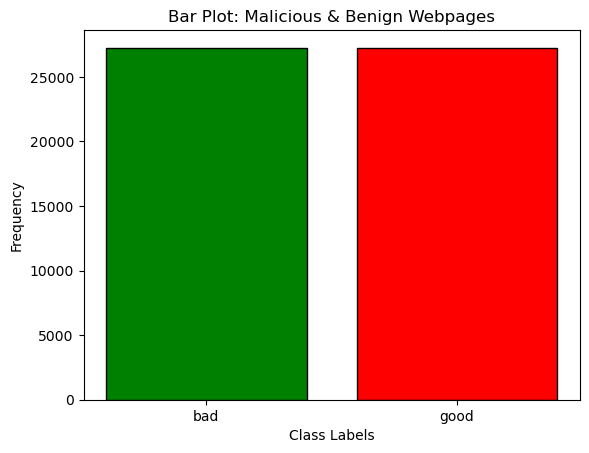

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Class Labels")
ax1.set_ylabel("Frequency") 
ax1.title.set_text('Bar Plot: Malicious & Benign Webpages')
labels = df_train_reduced['label'].value_counts()
w = (list(labels.index), list(labels.values))
ax1.tick_params(axis='both', which='major')
bar = ax1.bar(w[0], w[1], color=['green','red'], edgecolor='black', linewidth=1)

## Logistic Regression using the attributes: 'url_len', 'js_len', 'js_obf_len' 

In [37]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean= np.mean(X, axis=0)
    
    std= np.std(X, axis=0)
    
    X_norm = (X - mean) / std
    
    return X_norm , mean , std

In [38]:
from sklearn.linear_model import LogisticRegression


#data_n = df_train.iloc[:,3:6]
data_n = df_train_reduced.iloc[:,3:6]

X = data_n.values

#y = df_train.iloc[:, -1]
y = df_train_reduced.iloc[:, -1]

y = y.replace({'good': 0, 'bad': 1})

Xnorm, X_mean, X_std = featureNormalization(X)

logitN = LogisticRegression()
logitN.fit(Xnorm,y)
print('Accuracy of log reg classifier')
print(logitN.score(Xnorm, y))

Accuracy of log reg classifier
0.9456023190107511


## Test prediction

In [44]:
X_test = df_test_reduced.iloc[:, 3:6]
X_test = X_test.values

Xnorm, X_mean, X_std = featureNormalization(X)
X_test_norm, X_test_mean, X_test_std  = featureNormalization(X_test)

predictions = logitN.predict(X_test_norm)

predictions


array([0, 1, 1, ..., 1, 1, 1])

### Predictions Vs Real

In [46]:
from sklearn.metrics import classification_report, accuracy_score

y_test = df_test_reduced.iloc[:, -1]

y_test = y_test.replace({'good': 0, 'bad': 1})

y_test

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.9456023190107511
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27253
           1       1.00      0.89      0.94     27253

    accuracy                           0.95     54506
   macro avg       0.95      0.95      0.95     54506
weighted avg       0.95      0.95      0.95     54506

